<h1 style="font-size: 80px", align="center">
    <center>Sales Prediction</center>
</h1>

<font size="2">Author: Muhammad Bilal</font>

<font size="2">Date: 1-10-2023</font>

## Project Goal


Make a sales prediction model based on the money spent on different advertisement platforms.

## Project Roadmap
* Import libraries and dataset
* Exploratory data analysis
* Model construction and evaluation
* Summary

## Dataset

The sales dataset has following variables:
* TV (advertisement spending on TV)
* Radio (advertisement spending on Radio)
* Newspaper (advertisement spending on Newspaper)
* Sales (Sales after advertisement spending)

## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

## Exploratory Data Analysis

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# missing data
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

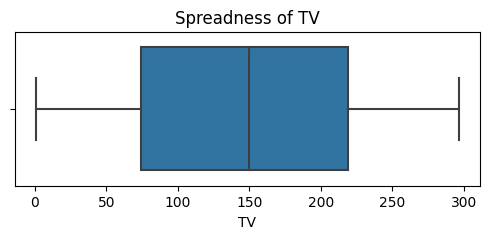

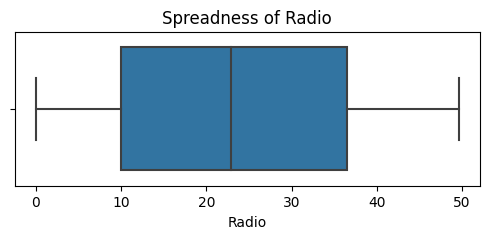

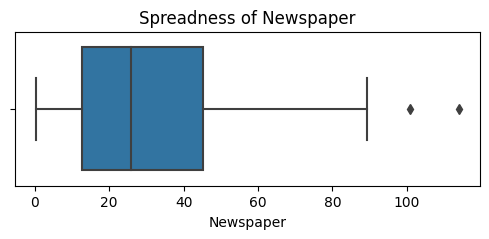

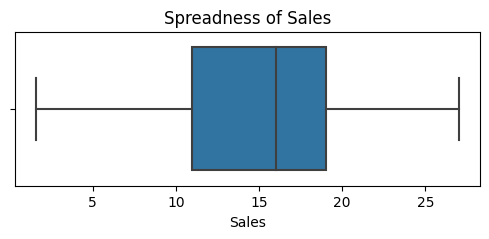

In [7]:
for col in df.columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=col, data=df)
    plt.title(f'Spreadness of {col}')
    plt.show()

The spreadness of variables tv, radio and sales shows no outliers but variable newspaper shows a few outliers.

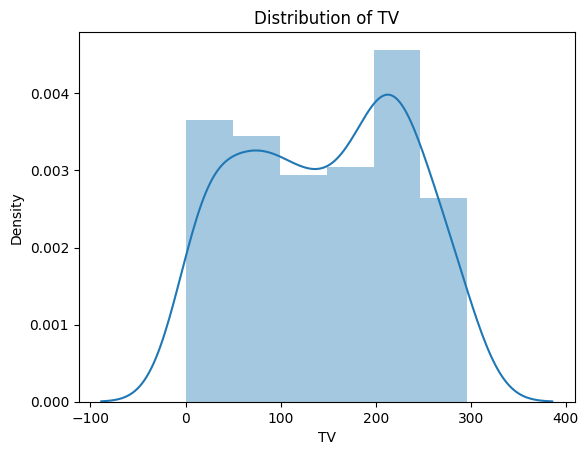

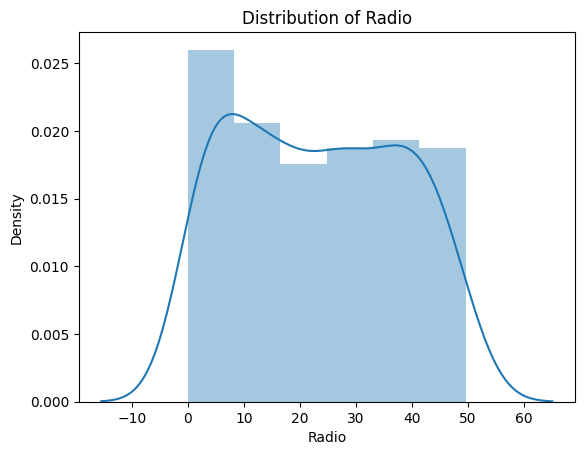

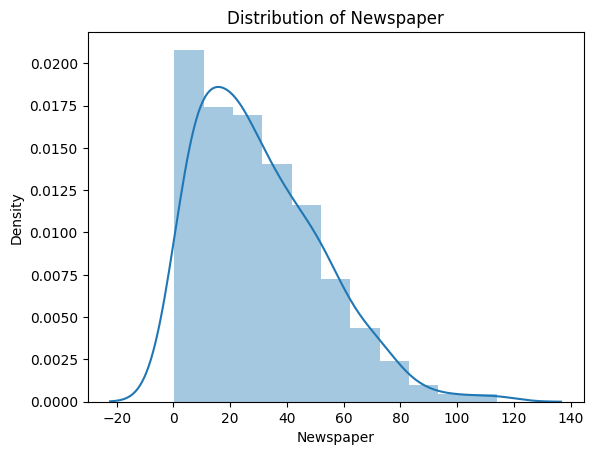

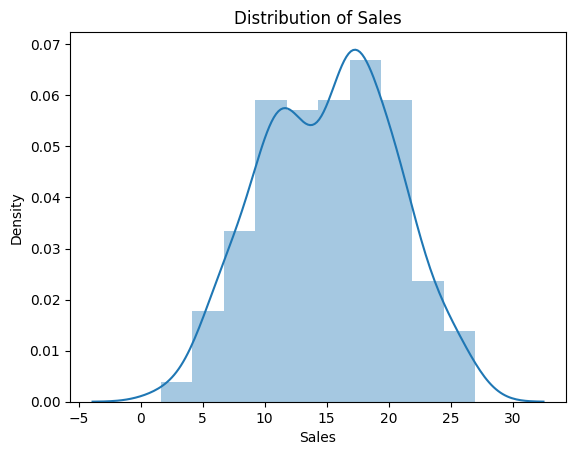

In [8]:
for col in df.columns:
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

The distribution of variables tv, radio and sales are almost like normal distributions but the variable newspaper have right skewed distribution.

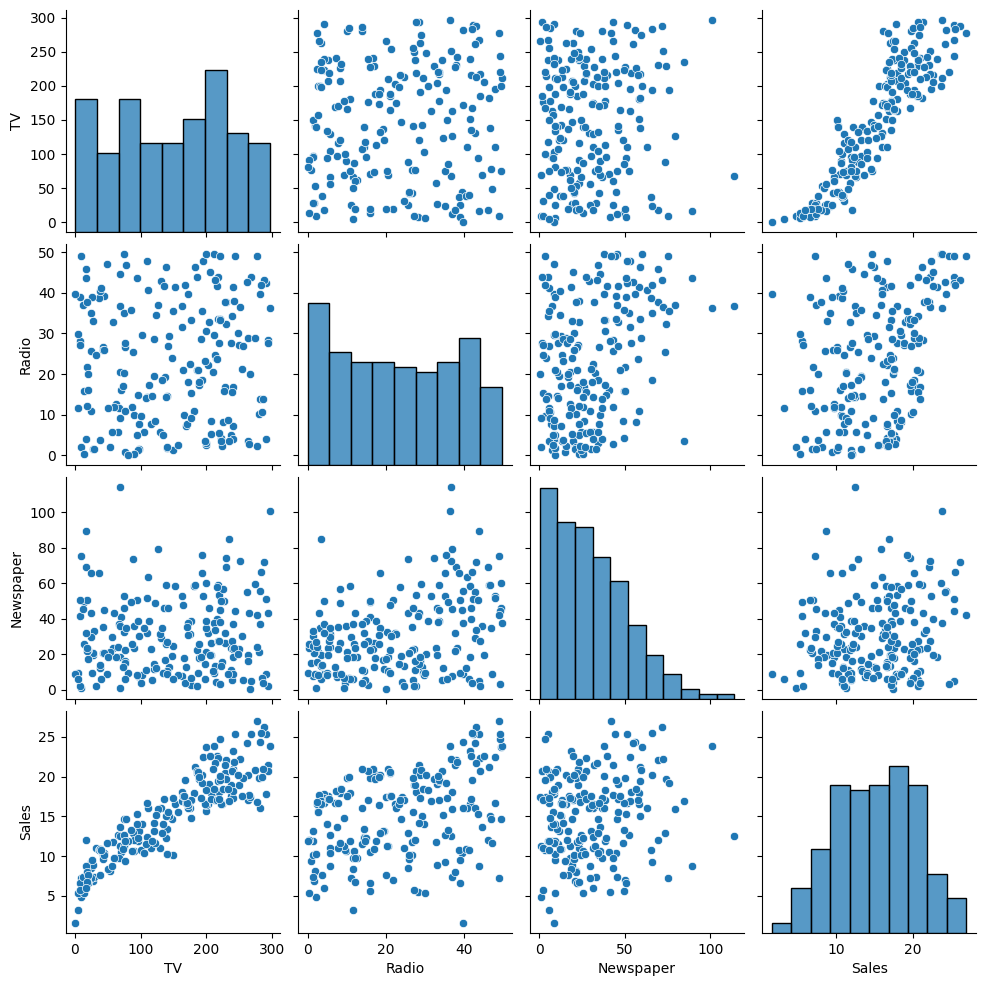

In [9]:
sns.pairplot(df);

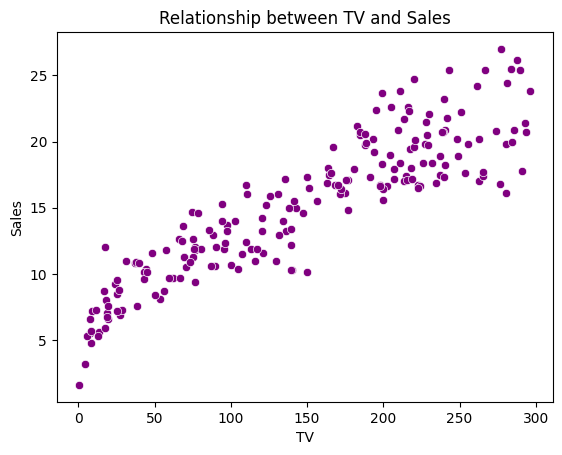

In [10]:
sns.scatterplot(data=df, x='TV', y='Sales', color='purple')
plt.title('Relationship between TV and Sales')
plt.show()

The above scatter plot shows that there is a positive and probably high correlation between TV and Sales.

**Correlation**

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


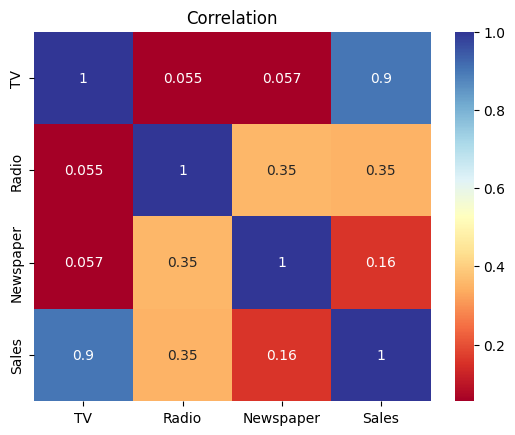

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

## Construct and Evaluate Model

### Linear Regression

In [13]:
# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
X = df.drop('Sales', axis=1)
y = df['Sales']
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [17]:
# create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Initiate the model and fit into the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [19]:
# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

Coefficient of determination:  0.9001416005862131


In [20]:
y_pred = LR.predict(X_train)

In [21]:
print('R^2: ', r2_score(y_train, y_pred))
print('MAE: ',mean_absolute_error(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

R^2:  0.9001416005862131
MAE:  1.2344160869575869
MSE:  2.6761426537826685
RMSE:  1.6358920055378559


In [22]:
# Evaluate the model performance on the testing data
print('Coefficient of determination: ', LR.score(X_test, y_test))

Coefficient of determination:  0.9059011844150826


In [23]:
y_pred_test = LR.predict(X_test)

In [24]:
print('R^2: ', r2_score(y_test, y_pred_test))
print('MAE: ',mean_absolute_error(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R^2:  0.9059011844150826
MAE:  1.2748262109549344
MSE:  2.9077569102710923
RMSE:  1.7052146229349232


In [25]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_test.ravel(),
                        'residual': y_test - y_pred_test}
                      )
results.head()

,actual,predicted,residual
95,16.9,17.034772,-0.134772
15,22.4,20.409740,1.990260
30,21.4,23.723989,-2.323989
158,7.3,9.272785,-1.972785
128,24.7,21.682719,3.017281


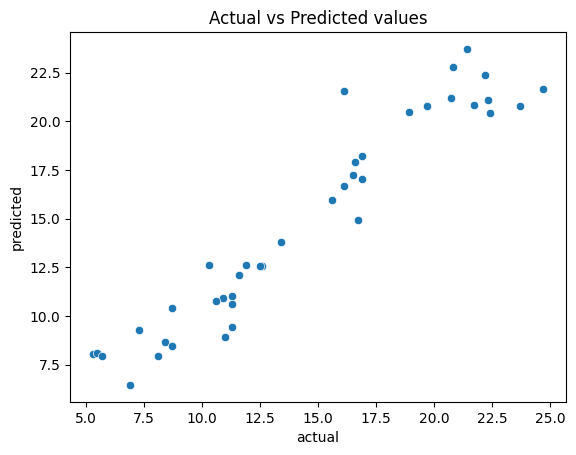

In [26]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'],
y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

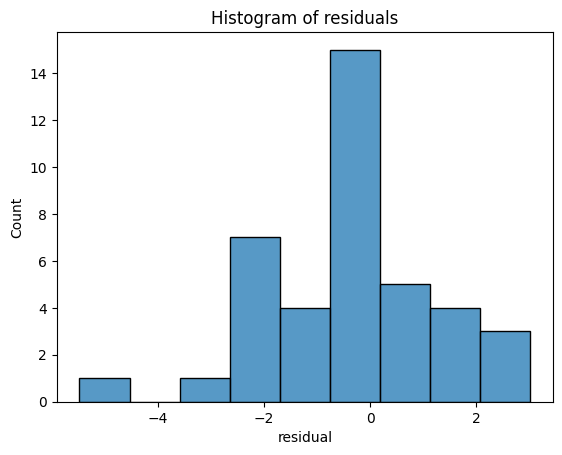

In [27]:
 # Visualize the distribution of the `residuals`
sns.histplot(results['residual'])
plt.title('Histogram of residuals')
plt.show()

In [28]:
# Calculate residual mean
results['residual'].mean()

-0.3985033850308548

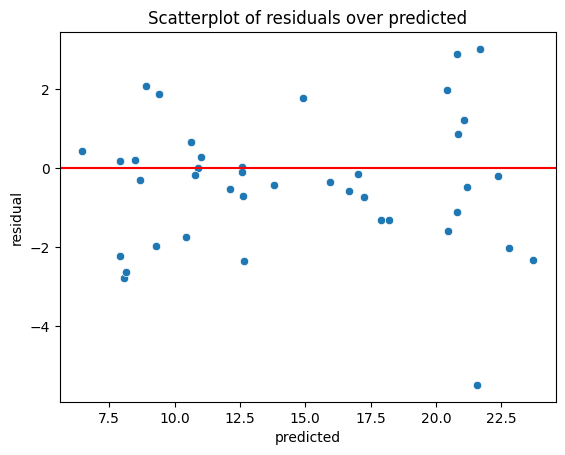

In [29]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

In [30]:
# Output the model's coefficients
coefficients = pd.DataFrame(LR.coef_, index=X.columns).T
coefficients

,TV,Radio,Newspaper
0,4.668138,1.494965,0.09421


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a Decision tree regression model
model = DecisionTreeRegressor(random_state=0)

param_grid = {'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': None}

In [34]:
y_pred_test = grid_search.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred_test))
print('MAE: ',mean_absolute_error(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R^2:  0.879284232600134
MAE:  1.3125000000000002
MSE:  3.7302499999999994
RMSE:  1.9313855130449744


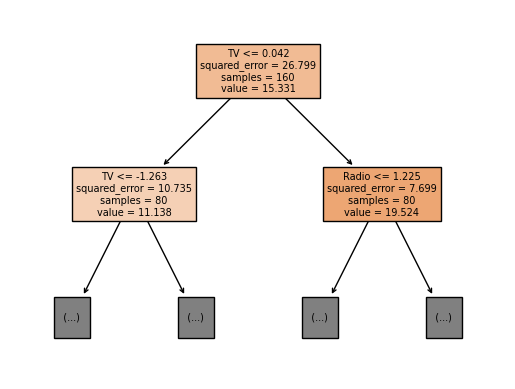

In [38]:
from sklearn.tree import plot_tree
plot_tree(tree, filled=True, feature_names=list(X.columns), max_depth=1) 
plt.show()

## Summary

The scatter plot of TV advertisement vs sales showed positive and high correlation of `0.9` between TV advertisement and sales.

The results from Linear Regression model are:

* R^2:  0.90

* MAE:  1.27

* MSE:  2.90

* RMSE:  1.7
    
The results from Decision Tree model are:  

* R^2:  0.87

* MAE:  1.31

* MSE:  3.73

* RMSE:  1.93